In [102]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from random import randrange
from tqdm import tqdm

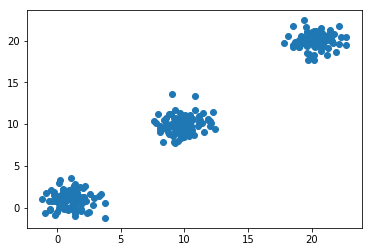

[[19.626, 21.089],
 [18.548, 21.785],
 [19.381, 19.696],
 [20.935, 19.991],
 [21.056, 20.507]]

In [103]:
# Getting the data:
with open('Data.txt', 'r') as file:
    data = [[float(n) for n in line.split()] for line in file]

# Plotting to see data distribution:
x = [row[0] for row in data]
y = [row[1] for row in data]
plt.scatter(x, y)
plt.show()
    
#Checking data format:
data[:5]

In [107]:
def compute_distance(pt1, pt2):
    distance = math.sqrt((pt1[0]-pt2[0])**2 +(pt1[1]-pt2[1])**2)
    return distance

#######################################################################

def get_initial_centers(pts_lst):
    # Getting a random point to be the mean of the first class:
    idx1 = randrange(len(pts_lst))
    C1_mean = pts_lst[idx1]
    pts_lst.remove(C1_mean)
    
    # Getting the mean of the second class:
    distances = [compute_distance(C1_mean, pt) for pt in pts_lst]
    idx2 = np.argmax(distances)
    C2_mean = pts_lst[idx2]
    pts_lst.remove(C2_mean)
    
    # Getting the mean of the third class:
    distances1 = [compute_distance(C1_mean, pt) for pt in pts_lst] # distances to first center
    distances2 = [compute_distance(C2_mean, pt) for pt in pts_lst] # distances to second center
    distances = [(1/2)*sum(x) for x in zip(distances1, distances2)] # Avergning the two distances to get the element the biggest average distance from both centers
    idx3 = np.argmax(distances)
    C3_mean = pts_lst[idx3]
    
    #print(C1_mean, C2_mean, C3_mean)
    
    # Retrieving the removed centers, just to be extra careful :D
    pts_lst.insert(idx1, C1_mean)
    pts_lst.insert(idx2, C2_mean)
    
    return C1_mean, C2_mean, C3_mean

#######################################################################

def update_center(rnk, pts):
    u_new =[]
    num_x = [a*b[0] for a,b in zip(rnk,pts)]
    den = sum(rnk)
    num_y = [a*b[1] for a,b in zip(rnk,pts)]
    u_new.append(sum(num_x)/den)
    u_new.append(sum(num_y)/den)
    return u_new

#######################################################################

def plot_clusters(u1, u2, u3, c1, c2, c3, save):
    # Seperation the x and y for each lst to plot:
    x1 = [pt[0] for pt in c1]
    y1 = [pt[1] for pt in c1]
    x2 = [pt[0] for pt in c2]
    y2 = [pt[1] for pt in c2]
    x3 = [pt[0] for pt in c3]
    y3 = [pt[1] for pt in c3]
    
    # Making the plot and saving:
    plt.scatter(x1,y1,color='yellow', marker='.')
    plt.scatter(x2,y2,color='blue', marker ='^')
    plt.scatter(x3,y3,color='green', marker = 'p')
    plt.scatter(u1[0], u1[1], color= 'red', marker='*')
    plt.scatter(u2[0], u2[1], color= 'red', marker='*')
    plt.scatter(u3[0], u3[1], color= 'red', marker='*')
    if (save):
        plt.savefig('Kmeans.jpg')
    else:
        plt.show()
    
#########################################################################

In [105]:
## How to decide rnk per class? Done! :))
## When to terminate iterations?

def train_kmeans(pts):
    u1, u2, u3 = get_initial_centers(pts)
    rnk1 = np.zeros(len(pts))
    rnk2 = np.zeros(len(pts))
    rnk3 = np.zeros(len(pts))
    
    avg_dists = 0.0
    
    diff_u1 = 10
    diff_u2 = 10
    diff_u3 = 10
    
    # Loop & update till converged
    while (diff_u1 > 0 or diff_u2 > 0 or diff_u3 > 0):
        # Setting the lists of rnk according to classes by looping over all points:       
        for j, pt in enumerate(pts):
            #Compute distances to all cluster means:
            dist1= compute_distance(pt, u1)
            dist2= compute_distance(pt, u2)
            dist3= compute_distance(pt, u3)

            # Setting the value of the class with the least distance to one
            if (dist1 < dist2 and dist1 < dist3):
                rnk1[j]=1
            elif(dist2 < dist3):
                rnk2[j]=1
            else:
                rnk3[j]=1

        # Update centers:
        u1_old = u1
        u2_old = u2
        u3_old = u3
        u1 = update_center(rnk1, pts)
        u2 = update_center(rnk2, pts)
        u3 = update_center(rnk3, pts)
        #print(u1, u2, u3)

        diff_u1 = (1/2)*sum(np.absolute(np.subtract(u1, u1_old)))
        diff_u2 = (1/2)*sum(np.absolute(np.subtract(u2, u2_old)))
        diff_u3 = (1/2)*sum(np.absolute(np.subtract(u3, u3_old)))
        
    #print(diff_u1, diff_u2, diff_u3)

    cluster1= [pts[i] for i in range(len(pts)) if rnk1[i]==1]
    cluster2= [pts[i] for i in range(len(pts)) if rnk2[i]==1]
    cluster3= [pts[i] for i in range(len(pts)) if rnk3[i]==1]
    plot_clusters(u1, u2, u3, cluster1, cluster2, cluster3, False)
    
    dists1 = [compute_distance(u1, point) for point in cluster1]
    sum_dists1 = sum(dists1)
    dists2 = [compute_distance(u2, point) for point in cluster2]
    sum_dists2 = sum(dists2)
    dists3 = [compute_distance(u3, point) for point in cluster3]
    sum_dists3 = sum(dists3)
    
    avg_dists = (sum_dists1 + sum_dists2 + sum_dists3)/3
    
    return avg_dists, u1, u2, u3
    

[8.0805, 9.0222] [22.729, 20.437] [-0.95393, -0.66564]
1.3577489898989903 1.4289090909090874 1.831594426
0.0 0.0 0.0


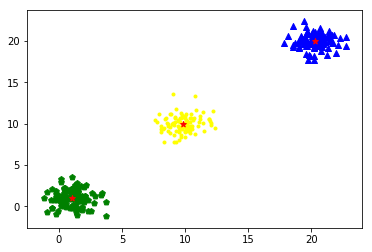

In [85]:
avg_dist, u1, u2, u3 = train_kmeans(data)

  0%|          | 0/100 [00:00<?, ?it/s]

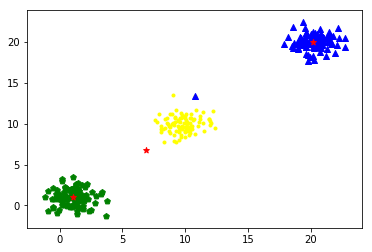

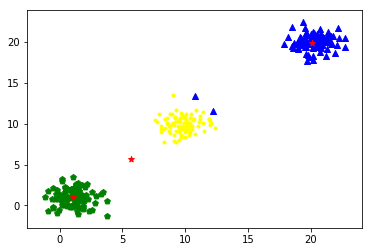

  2%|▏         | 2/100 [00:00<00:07, 12.54it/s]

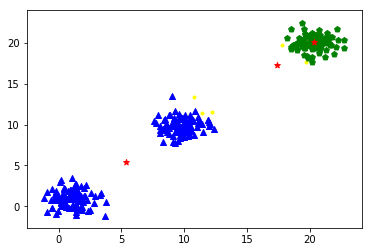

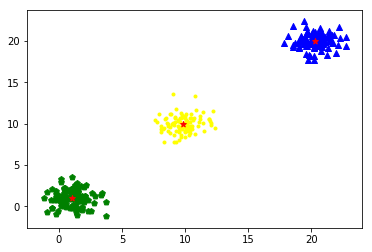

  4%|▍         | 4/100 [00:00<00:07, 12.92it/s]

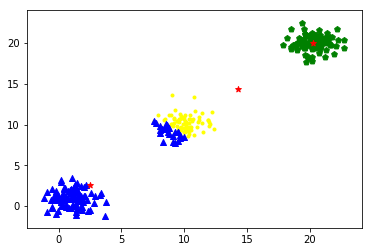

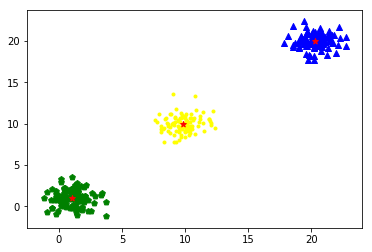

  6%|▌         | 6/100 [00:00<00:07, 12.56it/s]

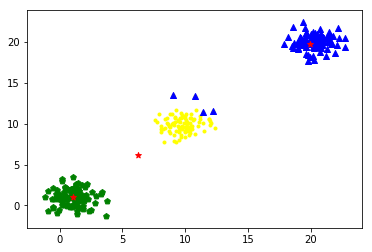

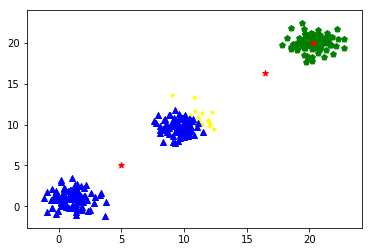

  8%|▊         | 8/100 [00:00<00:07, 12.90it/s]

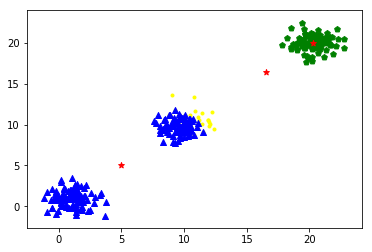

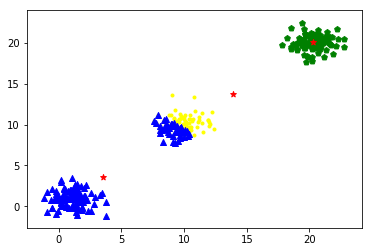

 10%|█         | 10/100 [00:00<00:06, 13.21it/s]

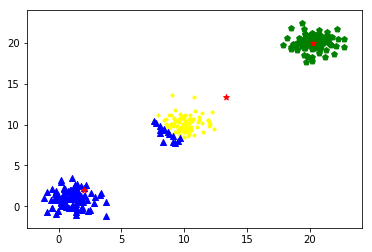

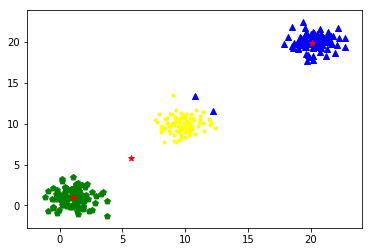

 12%|█▏        | 12/100 [00:00<00:06, 13.71it/s]

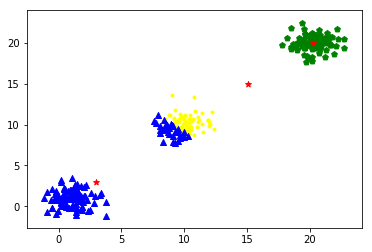

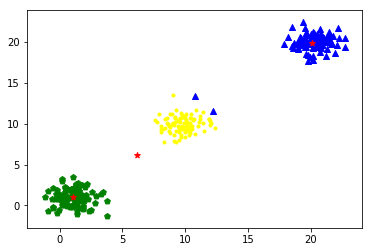

 14%|█▍        | 14/100 [00:01<00:06, 13.88it/s]

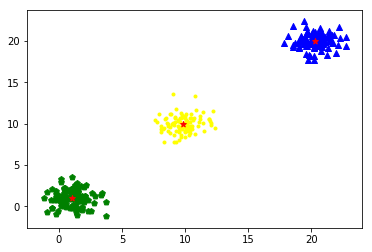

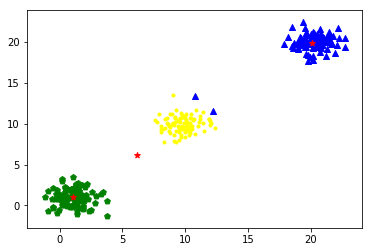

 16%|█▌        | 16/100 [00:01<00:05, 14.13it/s]

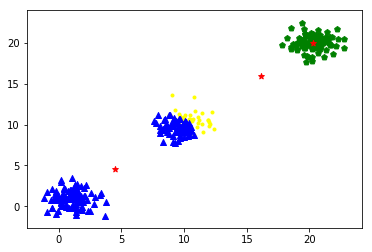

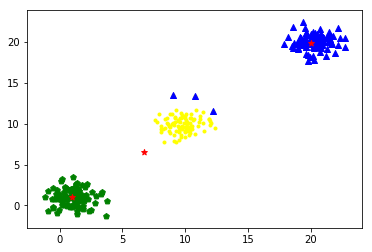

 18%|█▊        | 18/100 [00:01<00:06, 12.85it/s]

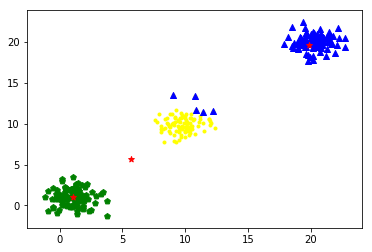

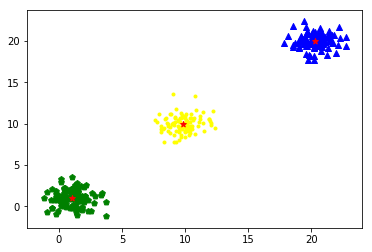

 20%|██        | 20/100 [00:01<00:06, 13.19it/s]

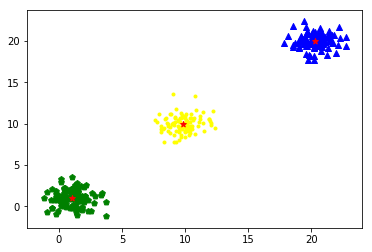

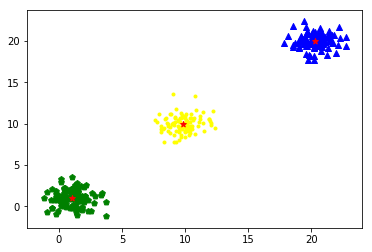

 22%|██▏       | 22/100 [00:01<00:05, 13.64it/s]

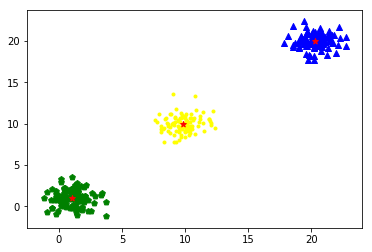

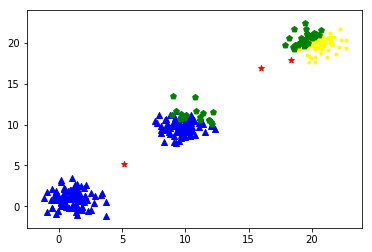

 24%|██▍       | 24/100 [00:01<00:05, 14.05it/s]

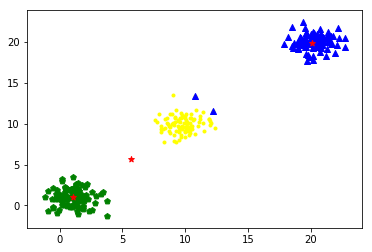

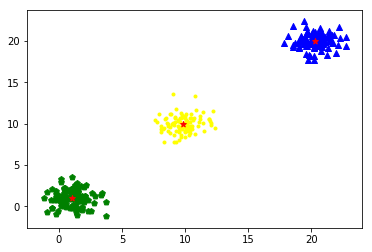

 26%|██▌       | 26/100 [00:01<00:05, 14.41it/s]

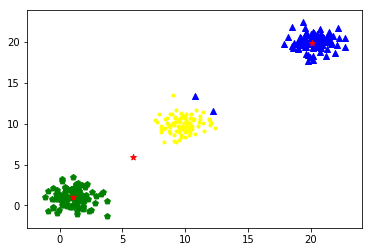

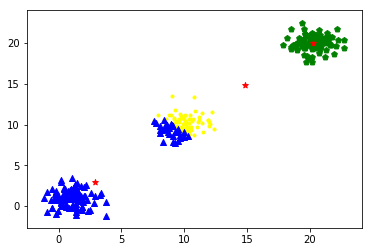

 28%|██▊       | 28/100 [00:02<00:05, 13.43it/s]

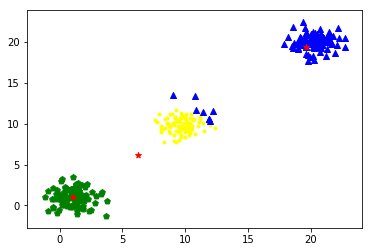

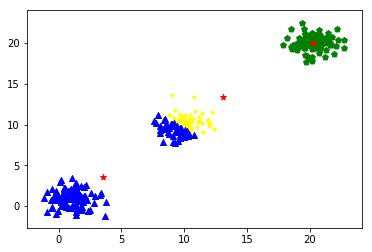

 30%|███       | 30/100 [00:02<00:05, 13.76it/s]

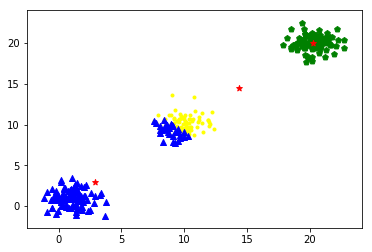

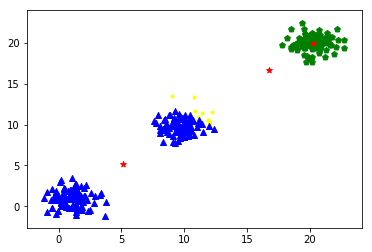

 32%|███▏      | 32/100 [00:02<00:04, 13.79it/s]

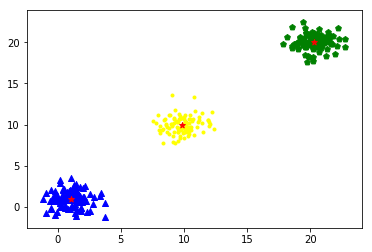

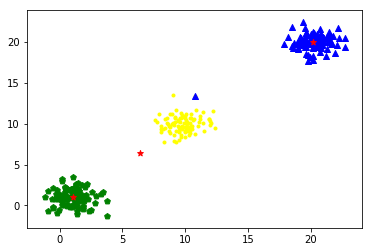

 34%|███▍      | 34/100 [00:02<00:04, 14.27it/s]

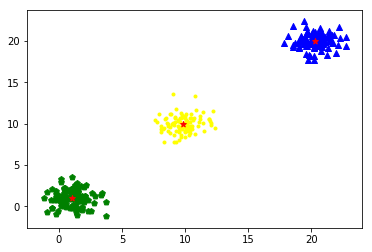

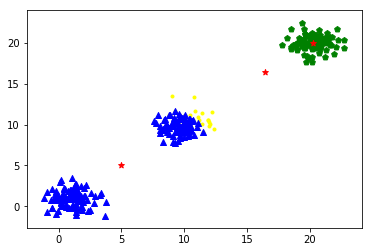

 36%|███▌      | 36/100 [00:02<00:04, 14.49it/s]

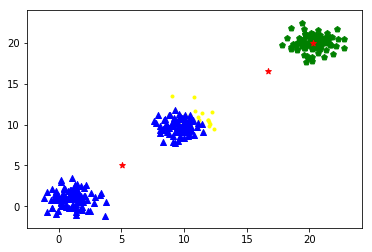

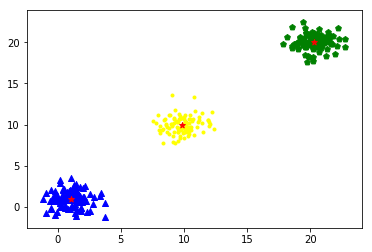

 38%|███▊      | 38/100 [00:02<00:04, 14.51it/s]

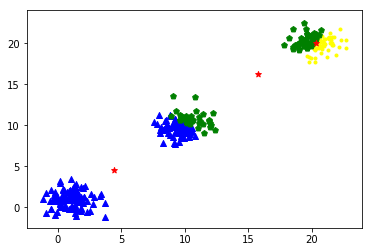

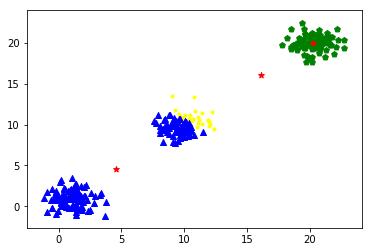

 40%|████      | 40/100 [00:02<00:04, 13.17it/s]

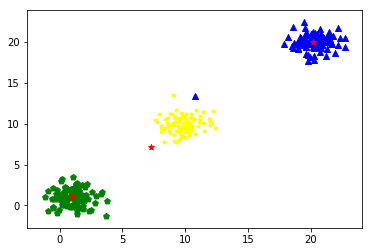

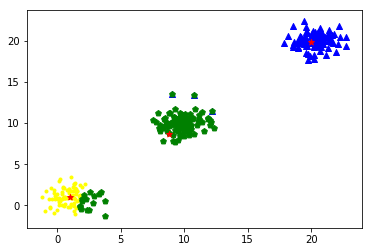

 42%|████▏     | 42/100 [00:03<00:04, 13.53it/s]

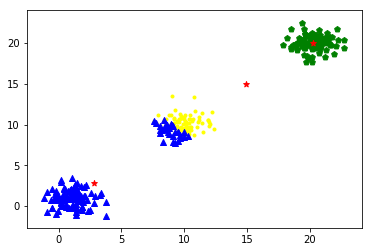

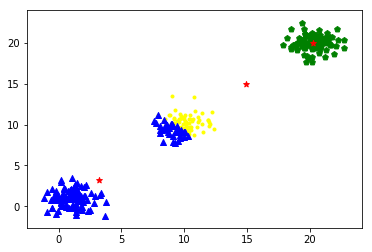

 44%|████▍     | 44/100 [00:03<00:04, 13.70it/s]

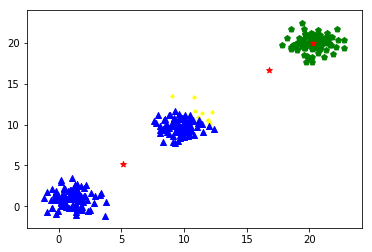

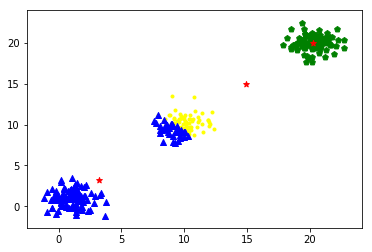

 46%|████▌     | 46/100 [00:03<00:03, 13.69it/s]

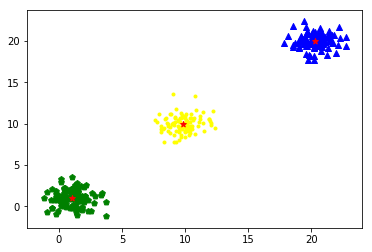

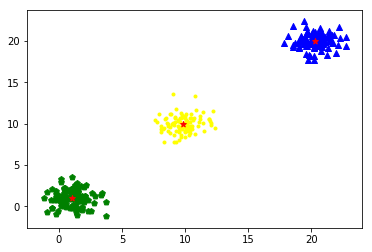

 48%|████▊     | 48/100 [00:03<00:03, 14.21it/s]

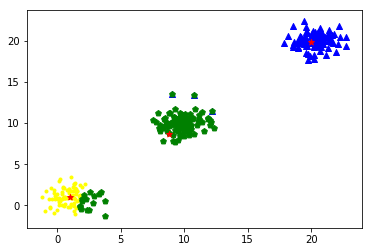

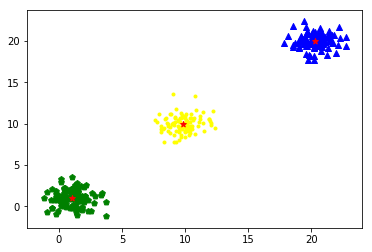

 50%|█████     | 50/100 [00:03<00:03, 13.51it/s]

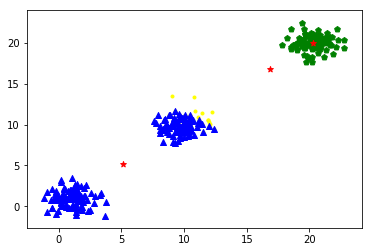

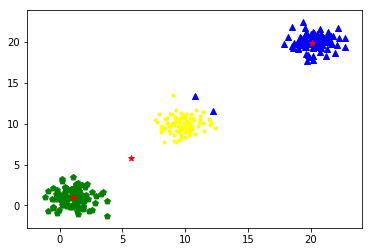

 52%|█████▏    | 52/100 [00:03<00:03, 13.71it/s]

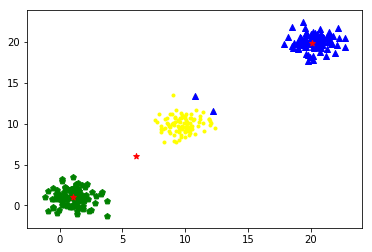

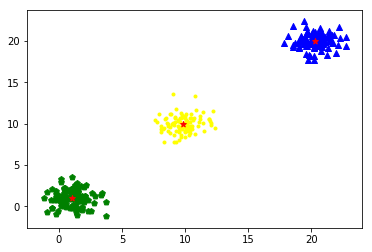

 54%|█████▍    | 54/100 [00:03<00:03, 14.03it/s]

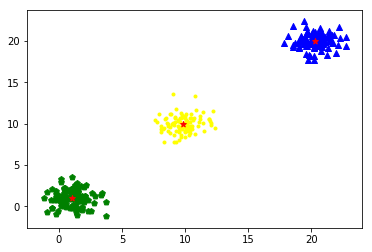

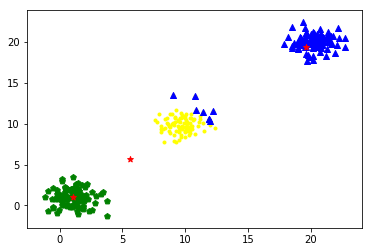

 56%|█████▌    | 56/100 [00:04<00:03, 14.18it/s]

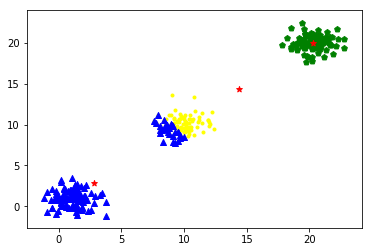

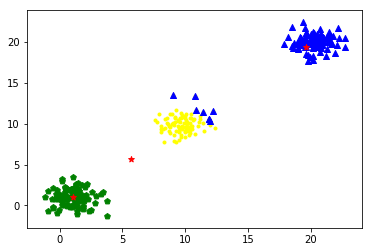

 58%|█████▊    | 58/100 [00:04<00:03, 13.70it/s]

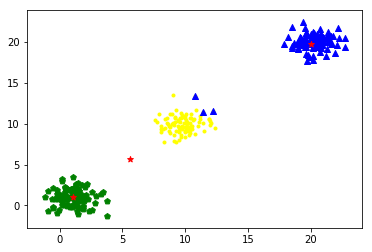

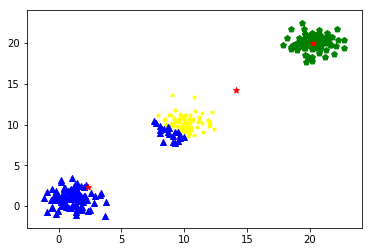

 60%|██████    | 60/100 [00:04<00:02, 13.50it/s]

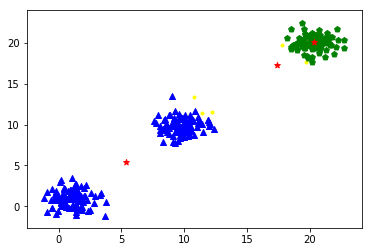

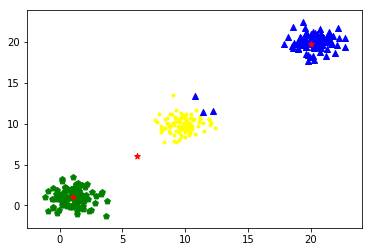

 62%|██████▏   | 62/100 [00:04<00:03, 12.32it/s]

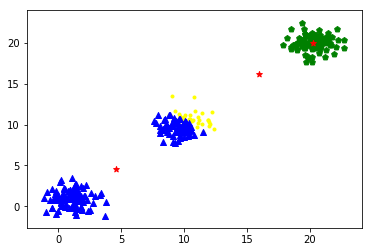

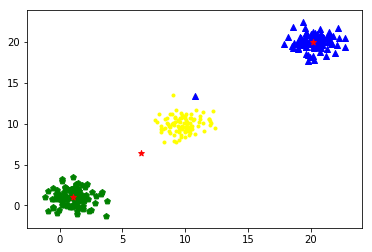

 64%|██████▍   | 64/100 [00:04<00:02, 12.48it/s]

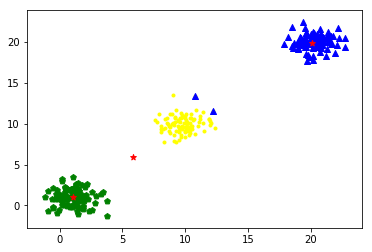

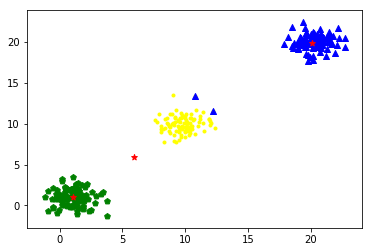

 66%|██████▌   | 66/100 [00:04<00:02, 13.01it/s]

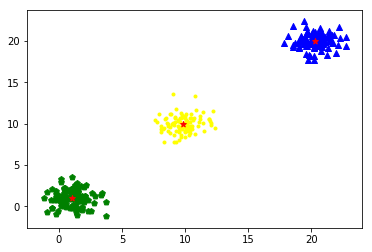

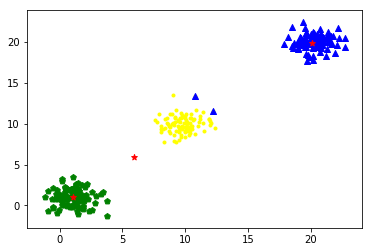

 68%|██████▊   | 68/100 [00:04<00:02, 13.61it/s]

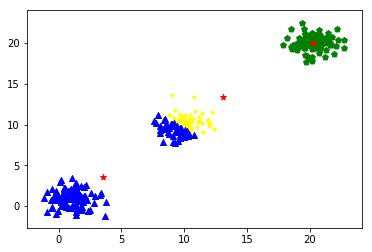

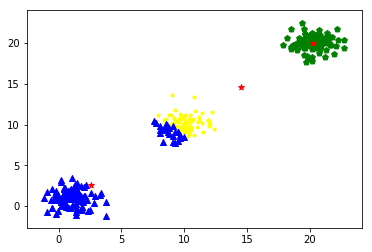

 70%|███████   | 70/100 [00:05<00:02, 13.85it/s]

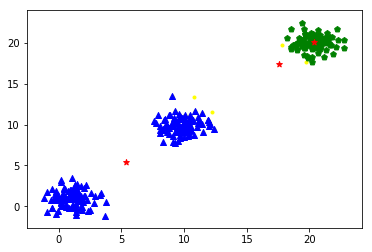

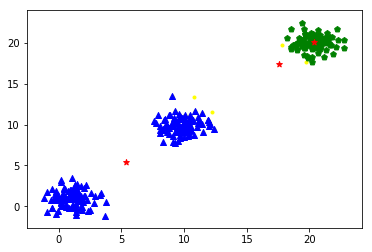

 72%|███████▏  | 72/100 [00:05<00:02, 12.97it/s]

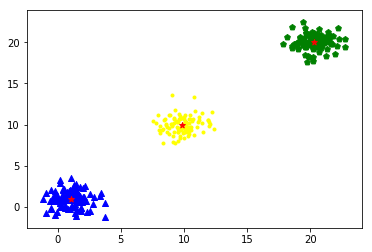

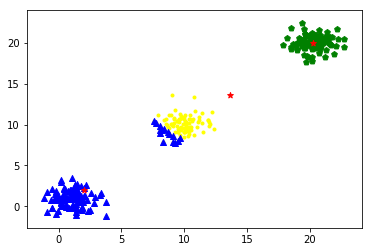

 74%|███████▍  | 74/100 [00:05<00:01, 13.61it/s]

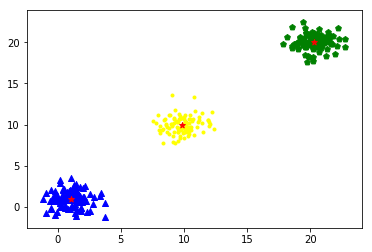

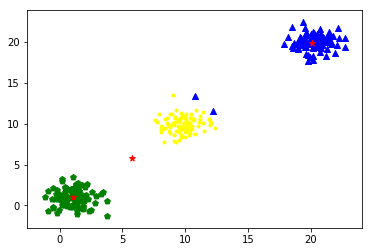

 76%|███████▌  | 76/100 [00:05<00:01, 13.99it/s]

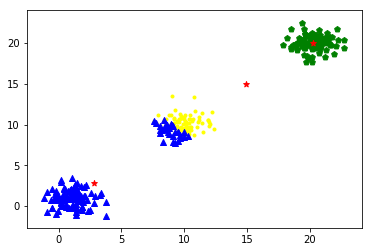

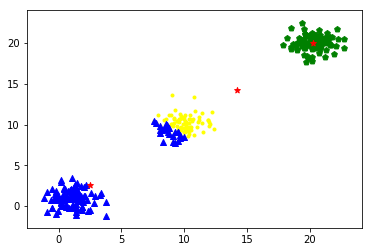

 78%|███████▊  | 78/100 [00:05<00:01, 14.05it/s]

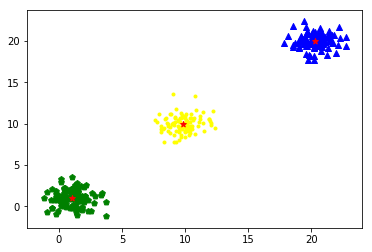

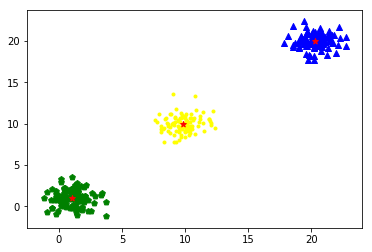

 80%|████████  | 80/100 [00:05<00:01, 14.41it/s]

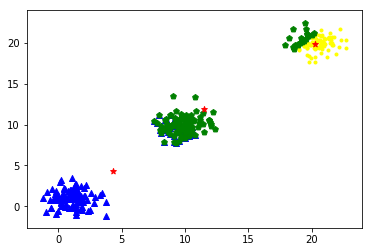

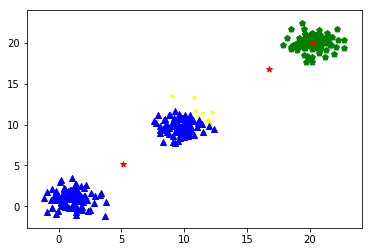

 82%|████████▏ | 82/100 [00:05<00:01, 14.40it/s]

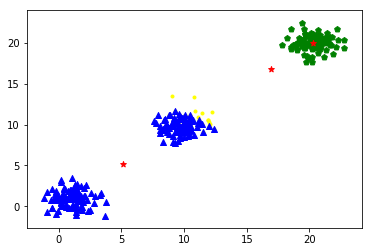

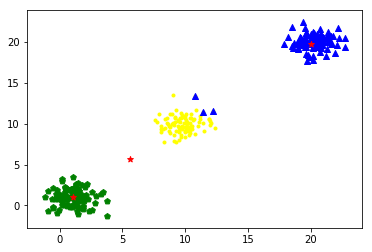

 84%|████████▍ | 84/100 [00:06<00:01, 13.49it/s]

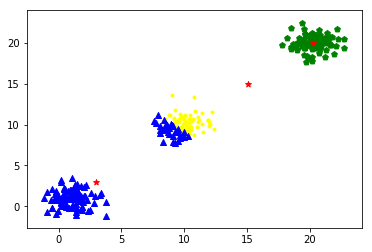

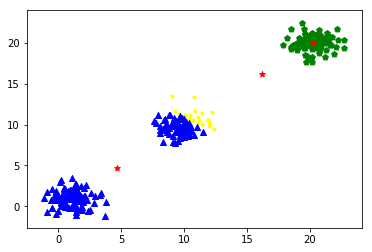

 86%|████████▌ | 86/100 [00:06<00:01, 13.70it/s]

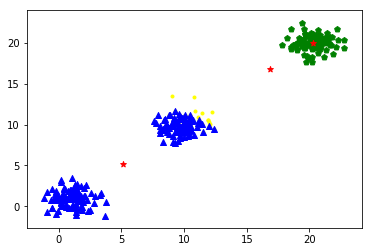

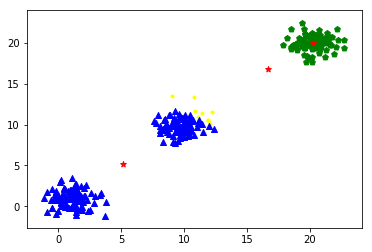

 88%|████████▊ | 88/100 [00:06<00:00, 13.85it/s]

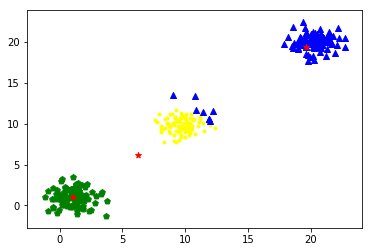

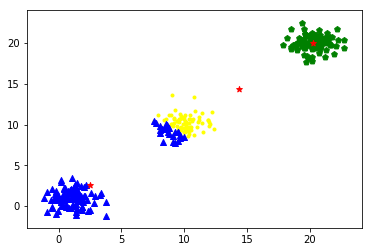

 90%|█████████ | 90/100 [00:06<00:00, 14.01it/s]

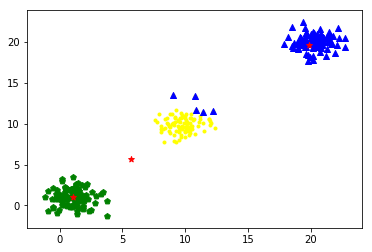

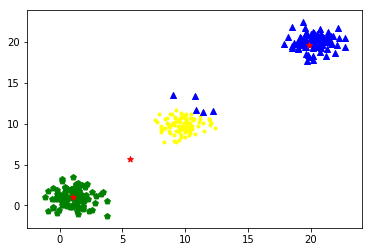

 92%|█████████▏| 92/100 [00:06<00:00, 14.35it/s]

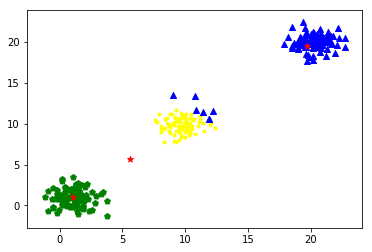

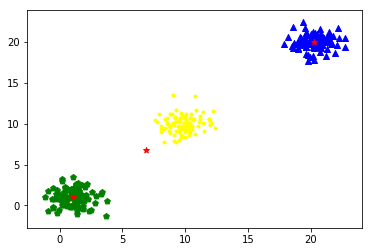

 94%|█████████▍| 94/100 [00:06<00:00, 13.56it/s]

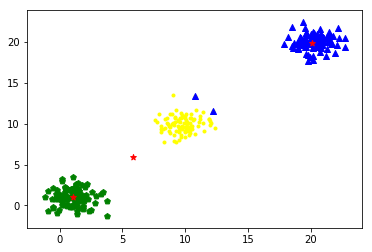

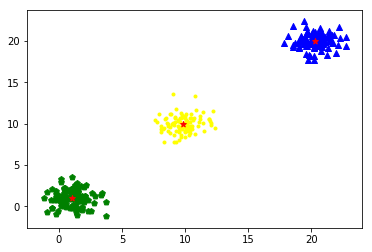

 96%|█████████▌| 96/100 [00:07<00:00, 14.01it/s]

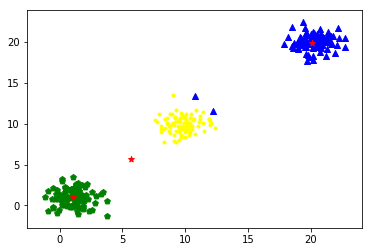

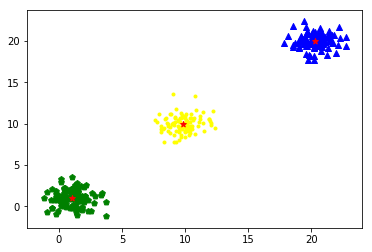

 98%|█████████▊| 98/100 [00:07<00:00, 14.20it/s]

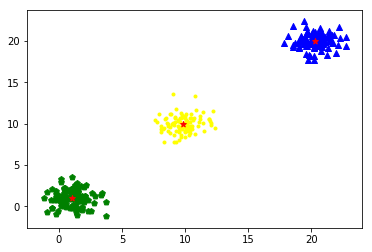

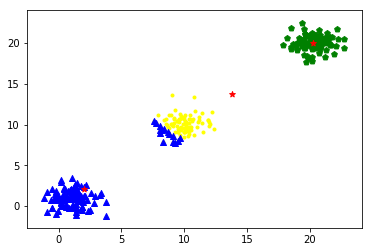

100%|██████████| 100/100 [00:07<00:00, 14.20it/s]


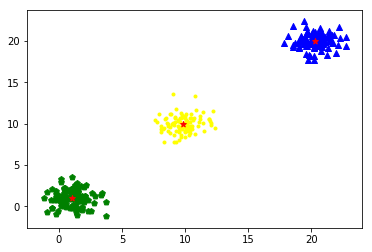

In [108]:
def main():
    average_distances = []
    centers = []
    rnk1 = np.zeros(len(data))
    rnk2 = np.zeros(len(data))
    rnk3 = np.zeros(len(data))

    # training with differenet intialization to get the best centers:
    for time in tqdm(range(1, 101)):
        avg_dist, u1, u2, u3 = train_kmeans(data)
        average_distances.append(avg_dist)
        new_centers = [u1, u2, u3]
        centers.append(new_centers)

    # Saving the best centers
    idx = np.argmin(average_distances)
    best_centers = centers[idx]
    u1 = best_centers[0]
    u2 = best_centers[1]
    u3 = best_centers[2]

    # Creating the figure and saving it:
    for j, pt in enumerate(data):
        #Compute distances to all cluster means:
        dist1= compute_distance(pt, u1)
        dist2= compute_distance(pt, u2)
        dist3= compute_distance(pt, u3)

        # Setting the value of the class with the least distance to one
        if (dist1 < dist2 and dist1 < dist3):
            rnk1[j]=1
        elif(dist2 < dist3):
            rnk2[j]=1
        else:
            rnk3[j]=1

    cluster1= [data[i] for i in range(len(data)) if rnk1[i]==1]
    cluster2= [data[i] for i in range(len(data)) if rnk2[i]==1]
    cluster3= [data[i] for i in range(len(data)) if rnk3[i]==1]
    plot_clusters(u1, u2, u3, cluster1, cluster2, cluster3, True)
    # Set accuracy criterea
    # train_kmeans(data, time)
    # zip(*pts)[1] # Get the second col?
    
main()